In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

def scrape_election_results(url, table_class):
    # Make a GET request to the URL
    response = requests.get(url)
    data = []

    try:
        # Check if the request was successful (status code 200)
        if response.status_code == 200:
            # Parse the HTML content of the page
            soup = BeautifulSoup(response.text, 'html.parser')

            # Find the table with the results
            table = soup.find('table', {'class': table_class})

            # Extract table headers
            headers = [header.get_text(strip=True) for header in table.find('thead').find_all('th')]
            headers.append('Link')  # Add a new header for the links

            # Extract table rows
            rows = table.find('tbody').find_all('tr')
            for row in rows:
                cols = row.find_all('td')
                row_data = {headers[i]: cols[i].get_text(strip=True) for i in range(len(headers) - 1)}

                # Check for anchor tags and add the link to the row data
                for col in cols:
                    link_tag = col.find('a')
                    if link_tag:
                        row_data['Link'] = link_tag['href']
                        break  # Assuming one link per row, break after finding the first link

                else:
                    row_data['Link'] = None  # If no link is found, set to None

                data.append(row_data)

            # Create DataFrame from the data
            df = pd.DataFrame(data)
            df['Link']= row_data['Link']='https://results.eci.gov.in/PcResultGenJune2024/'+df['Link']
            return df
        else:
            print(f"Failed to retrieve the webpage. Status code: {response.status_code}")
            return None
    except Exception as e:
        print(e)
        return None


In [ ]:
# Example usage:
url = 'https://results.eci.gov.in/PcResultGenJune2024/partywisewinresultState-369.htm'  # Replace with the actual URL
table_class = 'table table-striped table-bordered'  # Replace with the actual class name
df2 = scrape_election_results(url, table_class)
df2

,S.No,Parliament Constituency,Winning Candidate,Total Votes,Margin,Link
0,1,Anakapalle(5),C.M.RAMESH,762069,296530,https://results.eci.gov.in/PcResultGenJune2024...
1,2,Rajahmundry(8),DAGGUBATI PURANDHESHWARI,726515,239139,https://results.eci.gov.in/PcResultGenJune2024...
2,3,Narsapuram(9),BHUPATHI RAJU SRINIVASA VARMA (B.J.P.VARMA),707343,276802,https://results.eci.gov.in/PcResultGenJune2024...
3,4,Arunachal West(1),KIREN RIJIJU,205417,100738,https://results.eci.gov.in/PcResultGenJune2024...
4,5,Arunachal East(2),TAPIR GAO,145581,30421,https://results.eci.gov.in/PcResultGenJune2024...
...,...,...,...,...,...,...
235,236,North-West Delhi(5),YOGENDER CHANDOLIYA,866483,290849,https://results.eci.gov.in/PcResultGenJune2024...
236,237,West Delhi(6),KAMALJEET SEHRAWAT,842658,199013,https://results.eci.gov.in/PcResultGenJune2024...
237,238,South Delhi(7),RAMVIR SINGH BIDHURI,692832,124333,https://results.eci.gov.in/PcResultGenJune2024...
238,239,UDHAMPUR(4),DR JITENDRA SINGH,571076,124373,https://results.eci.gov.in/PcResultGenJune2024...


In [ ]:
df2.to_csv('election_results_PC_INDV.csv', index=False)

In [ ]:
df3 = pd.read_csv('election_results_PC.csv')
df3

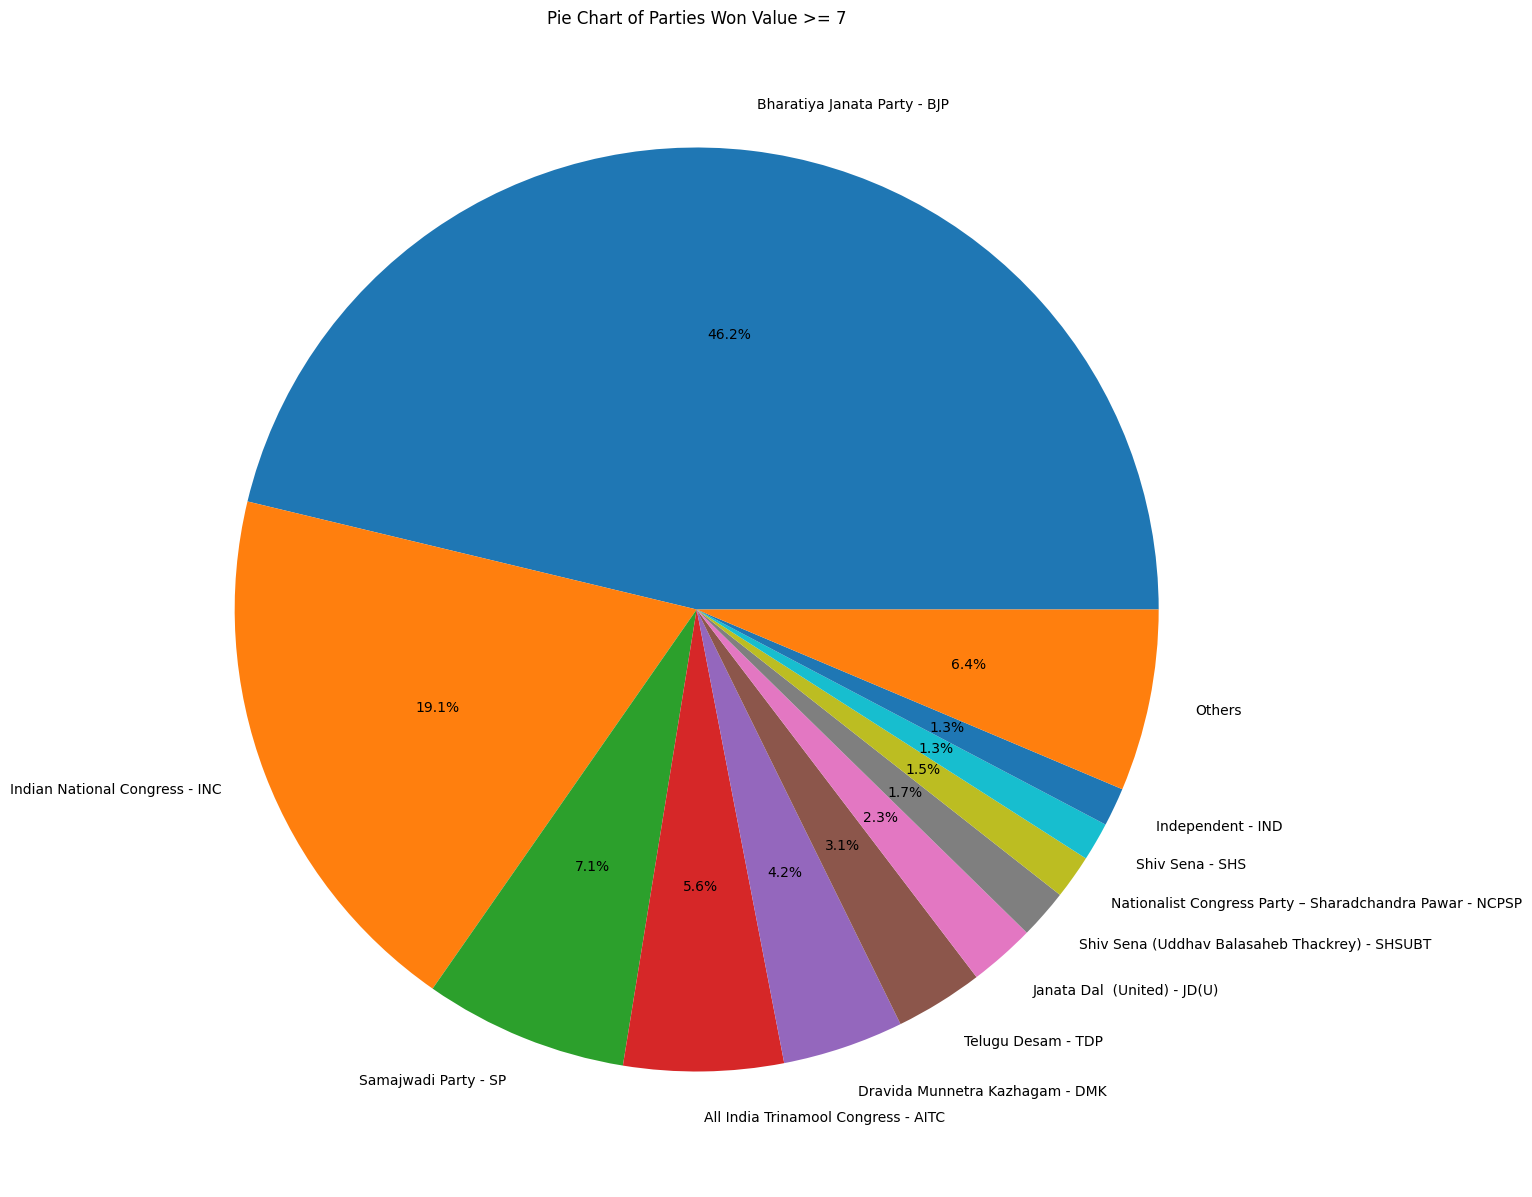

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Filter parties with won value greater than or equal to 7
filtered_df = df3[df3['Won'] >= 7]

# Group remaining parties as "Others"
others = df3[df3['Won'] <= 7]['Party'].value_counts().sum()

# Create a new DataFrame row for "Others"
new_row = {'Party': 'Others', 'Won': others}

# Concatenate filtered_df and the new row
filtered_df = pd.concat([filtered_df, pd.DataFrame([new_row])], ignore_index=True)

# Create a pie chart
plt.figure(figsize=(20, 15))
colors = plt.cm.tab10(np.arange(len(filtered_df)) % 10)
plt.pie(filtered_df['Won'], labels=filtered_df['Party'], colors=colors, autopct="%1.1f%%")
plt.title('Pie Chart of Parties Won Value >= 7')
plt.show()


In [ ]:
import pandas as pd

# Create an empty DataFrame to store results
df4 = pd.DataFrame()

for link, party in zip(df3['Link'], df3['Party']):
  # Example usage:
  table_class = 'table table-striped table-bordered'  # Replace with the actual class name
  # Scrape data using your scrape_election_results function

  df2 = scrape_election_results(link, table_class)
  df2['Party'] = party

  # Add a new 'Party' column with corresponding party from df3

  # Concatenate scraped DataFrame (df2) to the growing df4
  df4 = pd.concat([df4, df2], ignore_index=True)

# Now df4 contains combined results with a 'Party' column
df4


,S.No,Parliament Constituency,Winning Candidate,Total Votes,Margin,Link,Party
0,1,Anakapalle(5),C.M.RAMESH,762069,296530,https://results.eci.gov.in/PcResultGenJune2024...,Bharatiya Janata Party - BJP
1,2,Rajahmundry(8),DAGGUBATI PURANDHESHWARI,726515,239139,https://results.eci.gov.in/PcResultGenJune2024...,Bharatiya Janata Party - BJP
2,3,Narsapuram(9),BHUPATHI RAJU SRINIVASA VARMA (B.J.P.VARMA),707343,276802,https://results.eci.gov.in/PcResultGenJune2024...,Bharatiya Janata Party - BJP
3,4,Arunachal West(1),KIREN RIJIJU,205417,100738,https://results.eci.gov.in/PcResultGenJune2024...,Bharatiya Janata Party - BJP
4,5,Arunachal East(2),TAPIR GAO,145581,30421,https://results.eci.gov.in/PcResultGenJune2024...,Bharatiya Janata Party - BJP
...,...,...,...,...,...,...,...
538,3,Khadoor Sahib(3),AMRITPAL SINGH,404430,197120,https://results.eci.gov.in/PcResultGenJune2024...,Independent - IND
539,4,Faridkot(9),SARABJEET SINGH KHALSA,298062,70053,https://results.eci.gov.in/PcResultGenJune2024...,Independent - IND
540,5,Daman & Diu (1),PATEL UMESHBHAI BABUBHAI,42523,6225,https://results.eci.gov.in/PcResultGenJune2024...,Independent - IND
541,6,BARAMULLA(1),ABDUL RASHID SHEIKH,472481,204142,https://results.eci.gov.in/PcResultGenJune2024...,Independent - IND


from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['Winning Candidate']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'Winning Candidate'}, axis=1)
              .sort_values('Winning Candidate', ascending=True))
  xs = counted['Winning Candidate']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df4.sort_values('Winning Candidate', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Winning Candidate')
_ = plt.ylabel('count()')

In [ ]:
df4.to_csv('election_results_PC_ALL_INDV.csv', index=False)

In [ ]:
data = df4

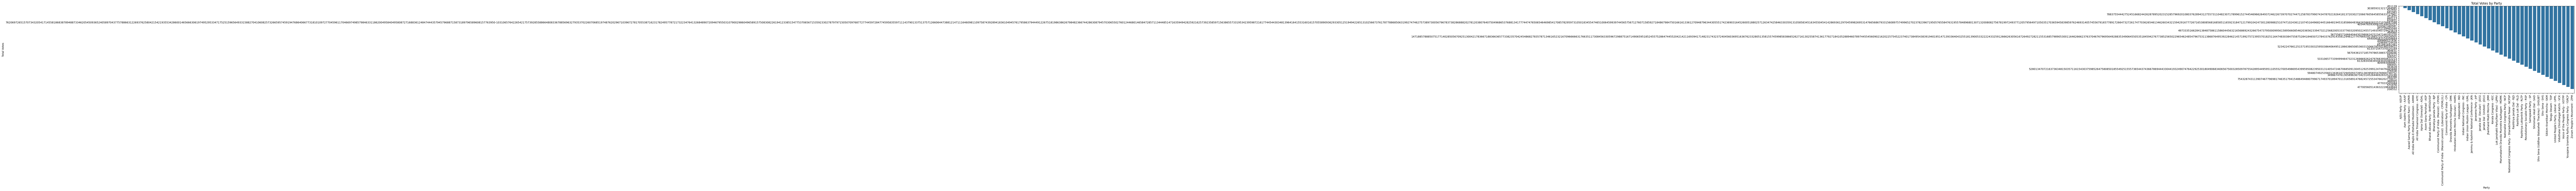

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

party_votes = data.groupby('Party')['Total Votes'].sum().reset_index()
plt.figure(figsize=(12, 6))
sns.barplot(x='Party', y='Total Votes', data=party_votes)
plt.xticks(rotation=90)
plt.title('Total Votes by Party')
plt.show()


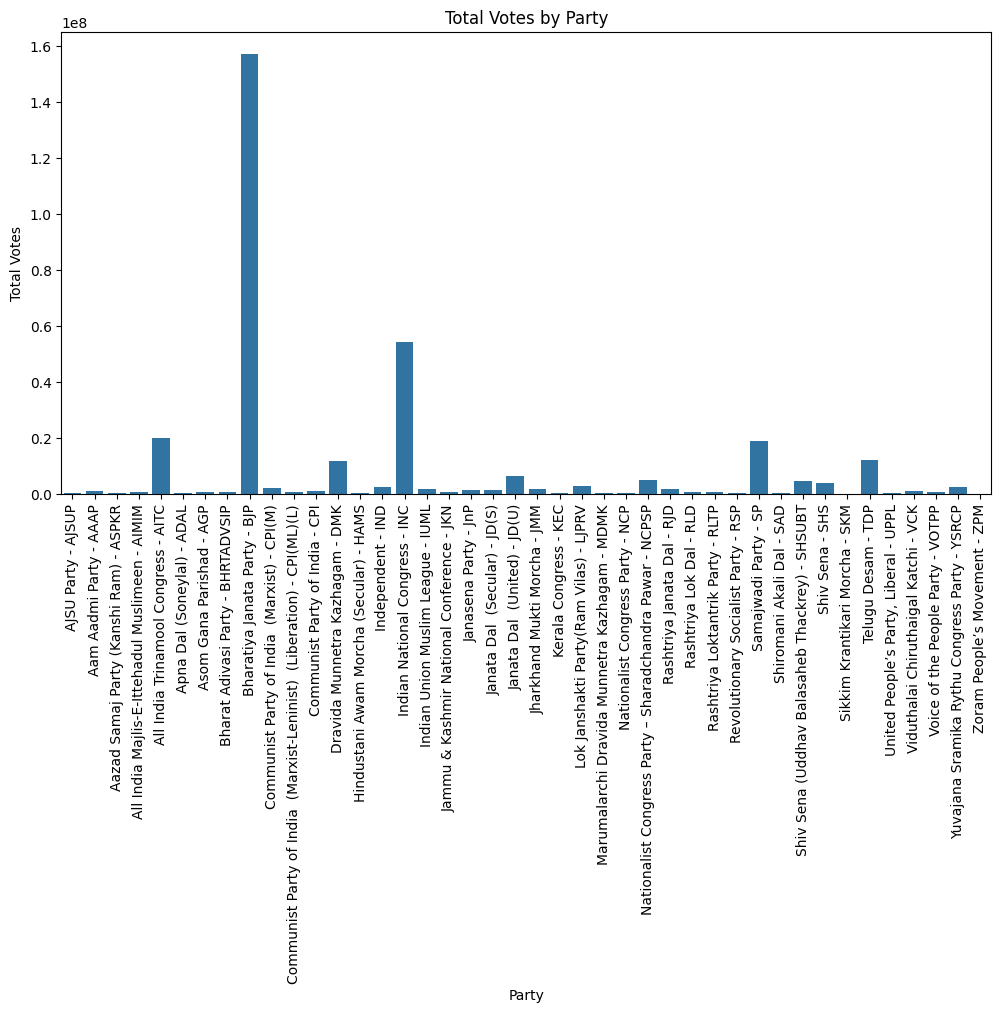

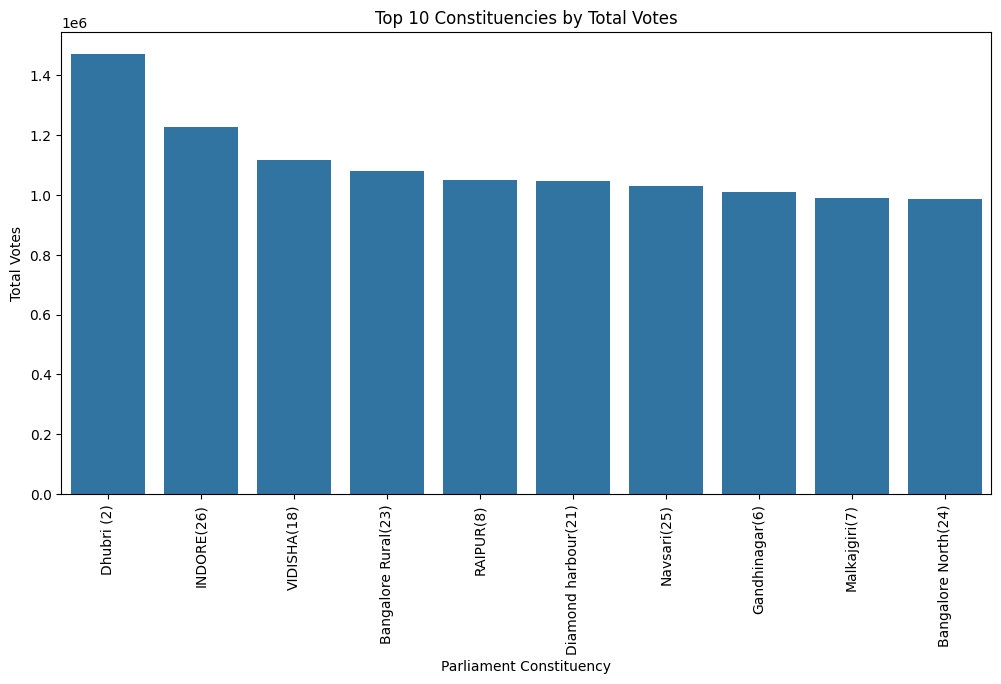

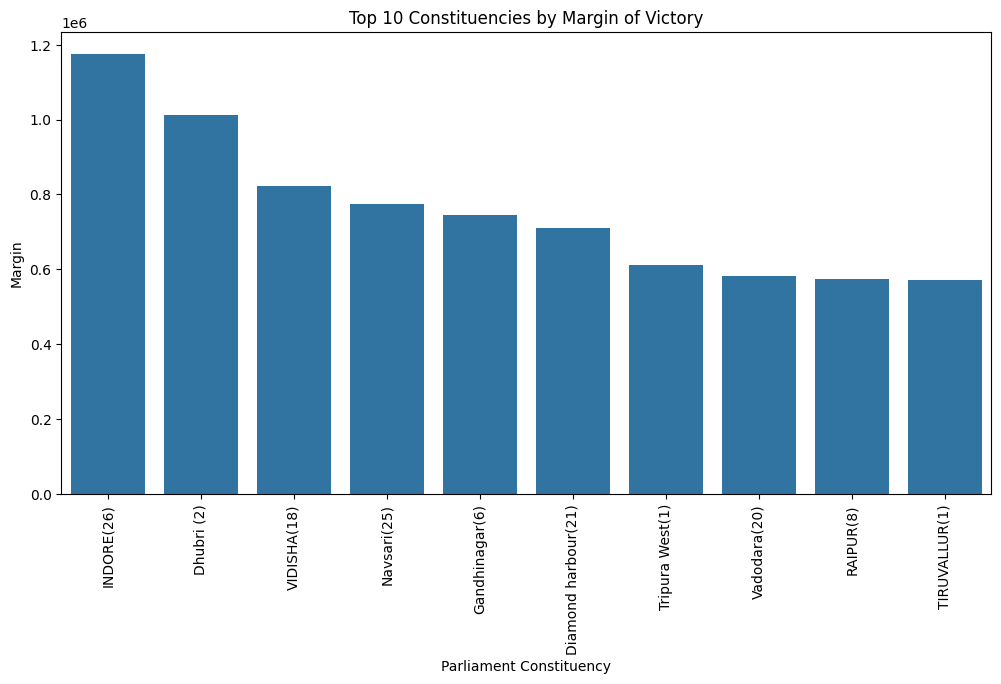

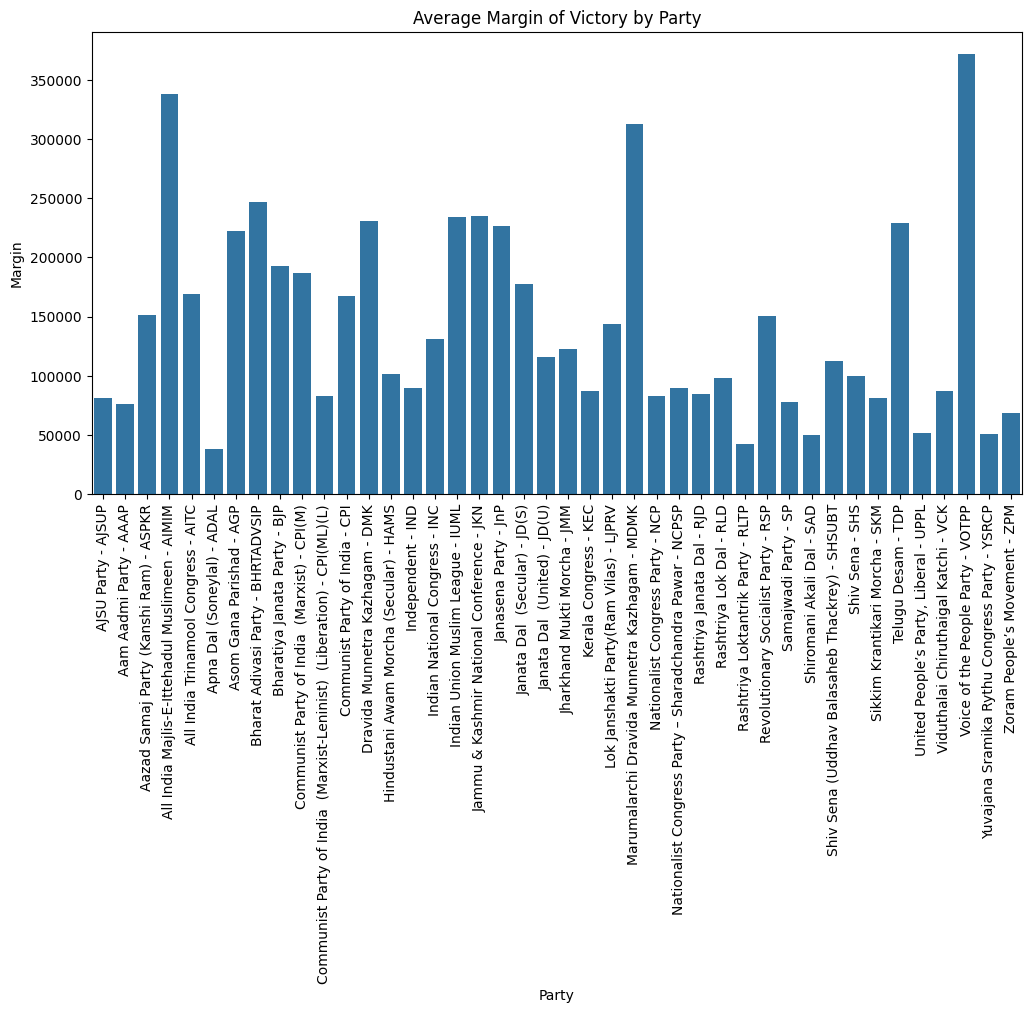

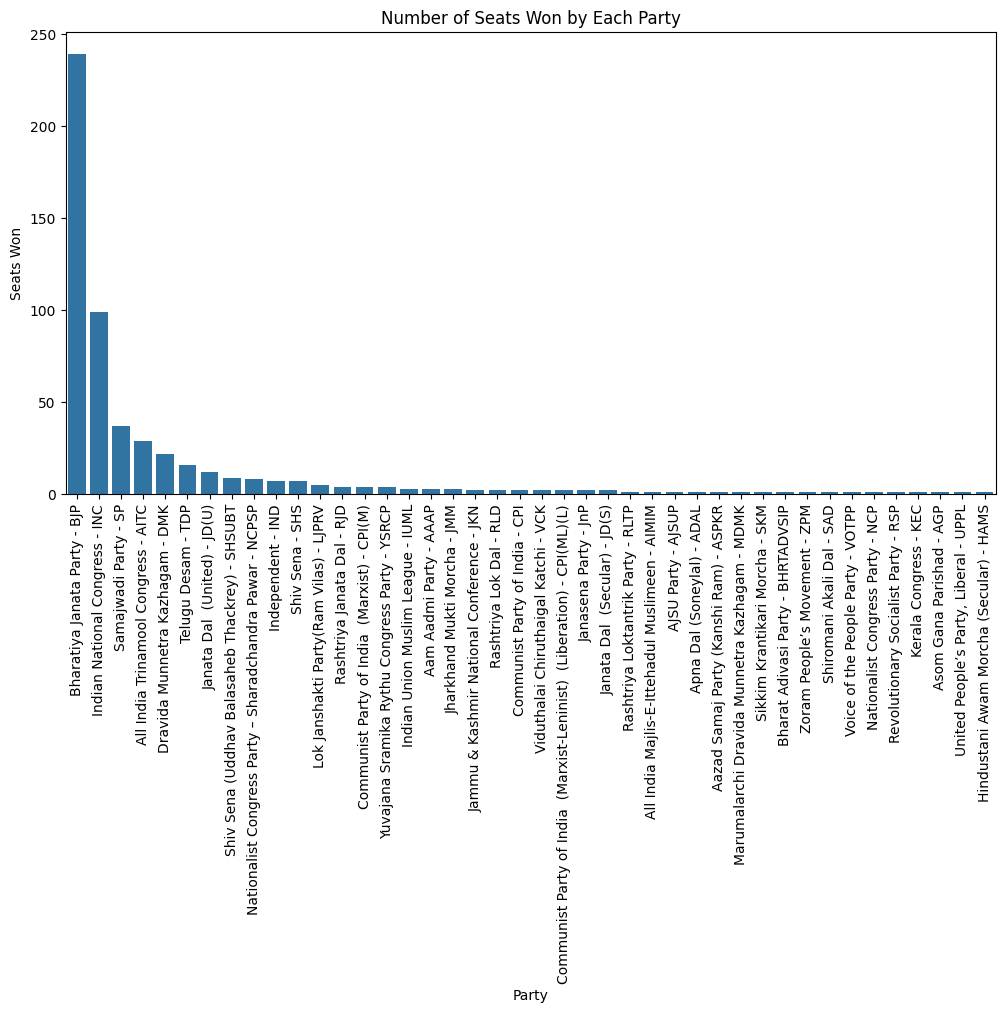

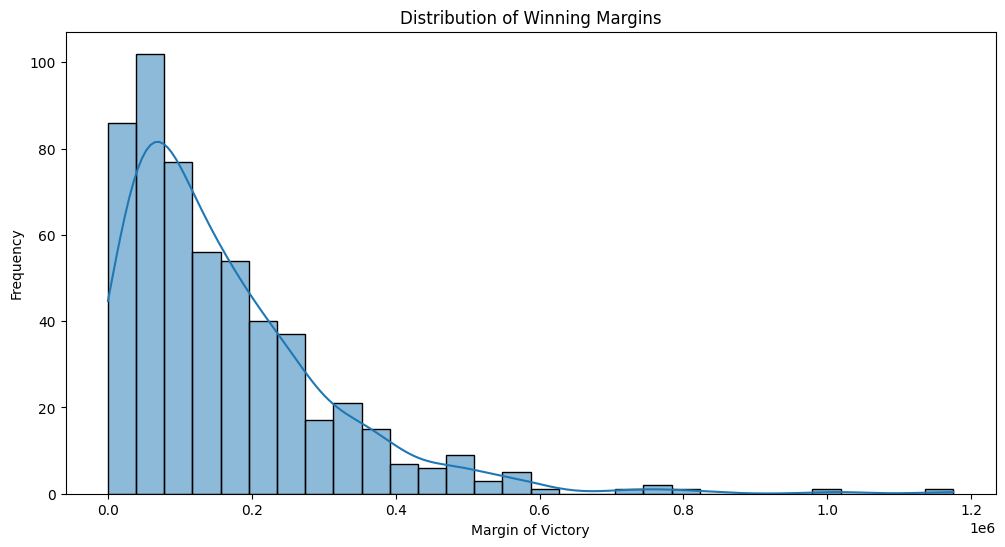

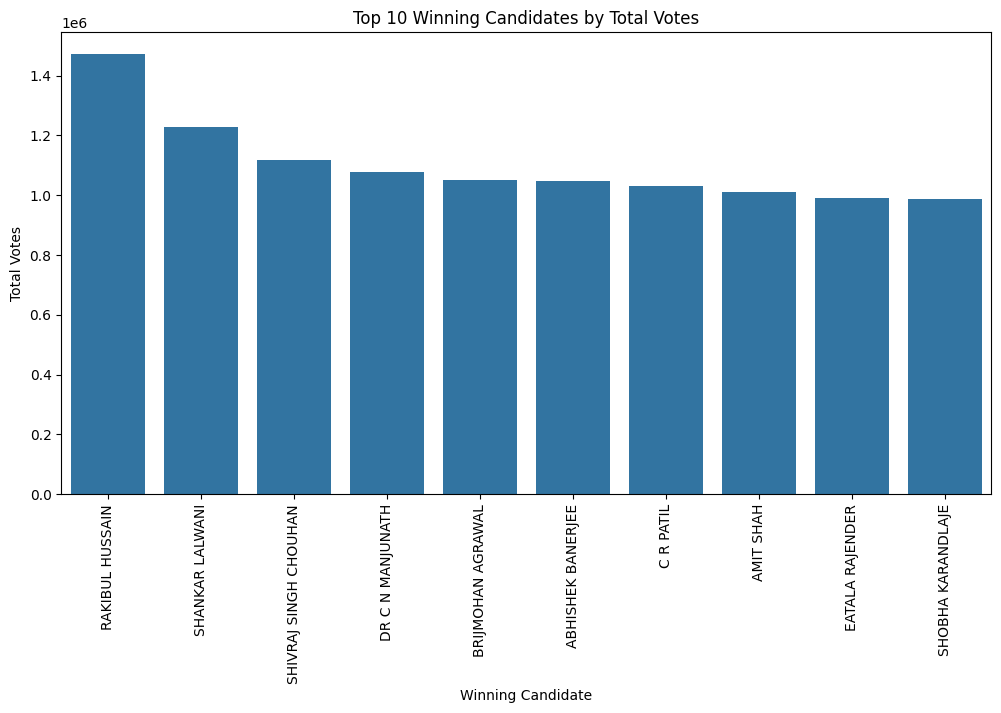

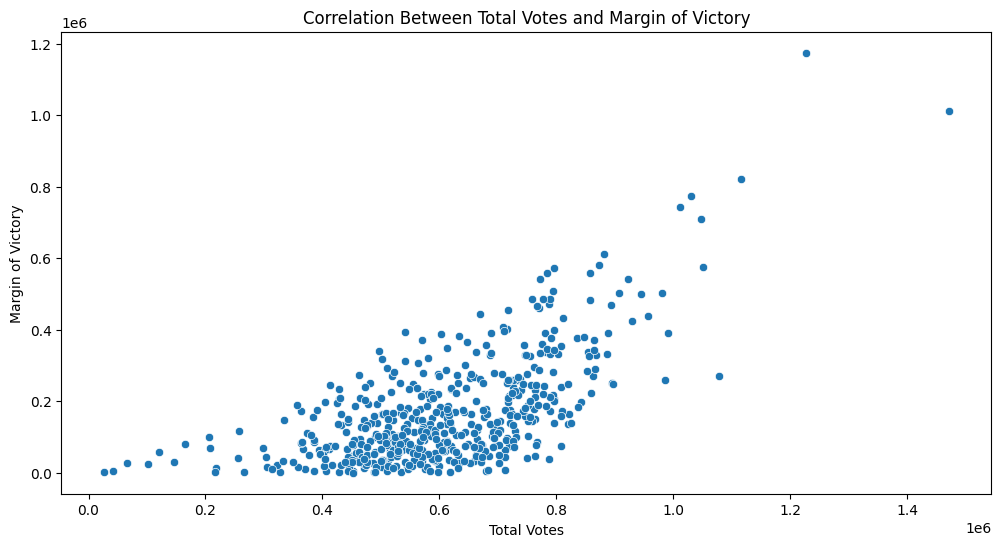

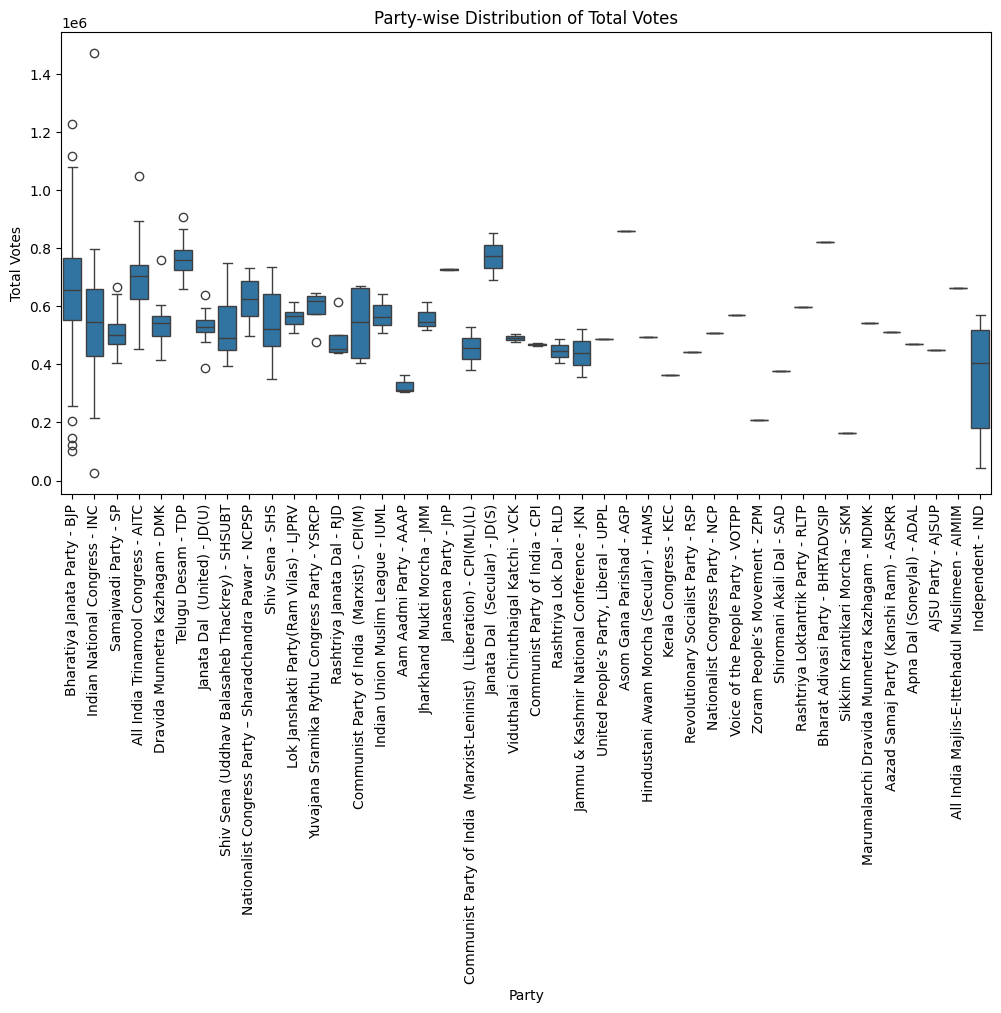

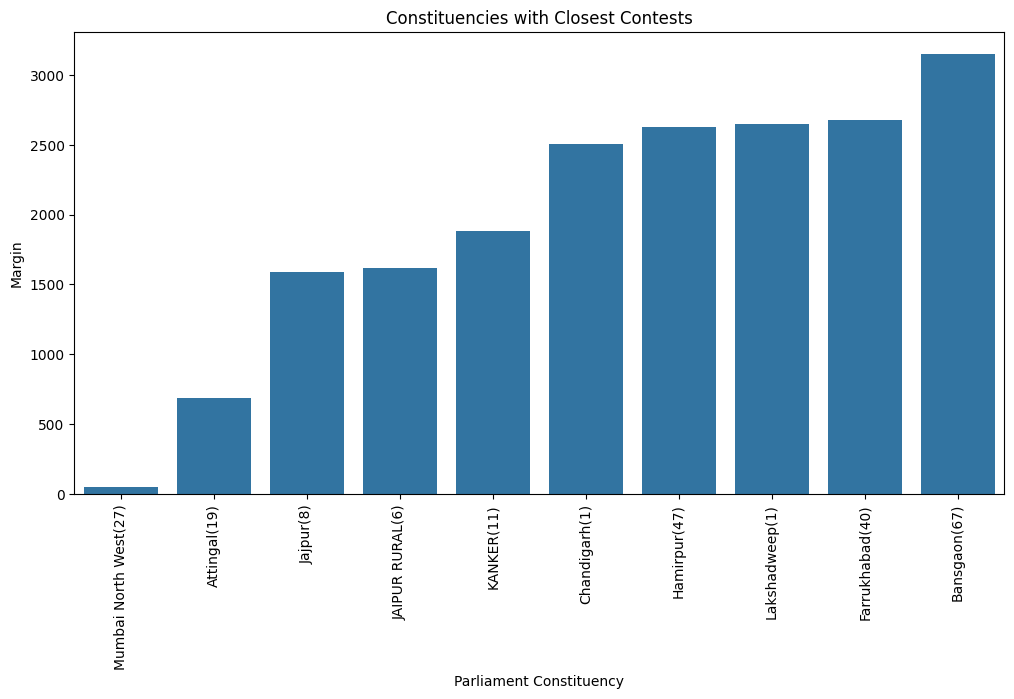

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data

# Convert 'Total Votes' and 'Margin' columns to numeric, replacing commas and handling errors
data['Total Votes'] = pd.to_numeric(data['Total Votes'].str.replace(',', ''), errors='coerce')
data['Margin'] = pd.to_numeric(data['Margin'].str.replace(',', ''), errors='coerce')

# Drop rows with invalid values
data.dropna(subset=['Total Votes', 'Margin'], inplace=True)

# 1. Distribution of Votes Across Parties
party_votes = data.groupby('Party')['Total Votes'].sum().reset_index()
plt.figure(figsize=(12, 6))
sns.barplot(x='Party', y='Total Votes', data=party_votes)
plt.xticks(rotation=90)
plt.title('Total Votes by Party')
plt.show()

# 2. Top 10 Constituencies by Total Votes
top_constituencies = data.nlargest(10, 'Total Votes')
plt.figure(figsize=(12, 6))
sns.barplot(x='Parliament Constituency', y='Total Votes', data=top_constituencies)
plt.xticks(rotation=90)
plt.title('Top 10 Constituencies by Total Votes')
plt.show()

# 3. Top 10 Constituencies by Margin of Victory
top_margin_constituencies = data.nlargest(10, 'Margin')
plt.figure(figsize=(12, 6))
sns.barplot(x='Parliament Constituency', y='Margin', data=top_margin_constituencies)
plt.xticks(rotation=90)
plt.title('Top 10 Constituencies by Margin of Victory')
plt.show()

# 4. Comparison of Average Margin of Victory by Party
avg_margin_party = data.groupby('Party')['Margin'].mean().reset_index()
plt.figure(figsize=(12, 6))
sns.barplot(x='Party', y='Margin', data=avg_margin_party)
plt.xticks(rotation=90)
plt.title('Average Margin of Victory by Party')
plt.show()

# 5. Number of Seats Won by Each Party
seats_won = data['Party'].value_counts().reset_index()
seats_won.columns = ['Party', 'Seats Won']
plt.figure(figsize=(12, 6))
sns.barplot(x='Party', y='Seats Won', data=seats_won)
plt.xticks(rotation=90)
plt.title('Number of Seats Won by Each Party')
plt.show()

# 6. Distribution of Winning Margins
plt.figure(figsize=(12, 6))
sns.histplot(data['Margin'], bins=30, kde=True)
plt.title('Distribution of Winning Margins')
plt.xlabel('Margin of Victory')
plt.ylabel('Frequency')
plt.show()

# 7. Top 10 Winning Candidates by Total Votes
top_candidates = data.nlargest(10, 'Total Votes')
plt.figure(figsize=(12, 6))
sns.barplot(x='Winning Candidate', y='Total Votes', data=top_candidates)
plt.xticks(rotation=90)
plt.title('Top 10 Winning Candidates by Total Votes')
plt.show()

# 8. Correlation Between Total Votes and Margin of Victory
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Total Votes', y='Margin', data=data)
plt.title('Correlation Between Total Votes and Margin of Victory')
plt.xlabel('Total Votes')
plt.ylabel('Margin of Victory')
plt.show()

# 9. Party-wise Distribution of Total Votes
plt.figure(figsize=(12, 6))
sns.boxplot(x='Party', y='Total Votes', data=data)
plt.xticks(rotation=90)
plt.title('Party-wise Distribution of Total Votes')
plt.show()

# 10. Constituencies with Closest Contests (Smallest Margins)
closest_contests = data.nsmallest(10, 'Margin')
plt.figure(figsize=(12, 6))
sns.barplot(x='Parliament Constituency', y='Margin', data=closest_contests)
plt.xticks(rotation=90)
plt.title('Constituencies with Closest Contests')
plt.show()
